### EDA No Frills No Name Pricing Data

### Import Libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

### Reading and Understanding Data

In [91]:
df = pd.read_csv('csv/all_data.csv', dtype={'Store ID': str})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099168 entries, 0 to 1099167
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Date            1099168 non-null  int64  
 1   Store ID        1099168 non-null  object 
 2   Code            1099168 non-null  object 
 3   Article Number  1099168 non-null  int64  
 4   Name            1099168 non-null  object 
 5   aisle           1099168 non-null  object 
 6   Brand           1099168 non-null  object 
 7   Package Size    1098313 non-null  object 
 8   Price           1099168 non-null  float64
 9   Unit            1099168 non-null  object 
 10  Sale Type       1099168 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 92.2+ MB


In [92]:
df.nunique()

Date               240
Store ID           274
Code              1305
Article Number    1304
Name              1188
aisle               12
Brand                1
Package Size       307
Price              270
Unit                 4
Sale Type            2
dtype: int64

### To-Do's

- Check duplicates
- Check missing values
- Transform Date from int64 to datetime format
- Check values in categorical features

#### Transform Date from int64 to datetime format

In [93]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y%m%d')
df['Date'] = df['Date'].dt.strftime('%m-%d-%Y')

In [94]:
df.head()

,Date,Store ID,Code,Article Number,Name,aisle,Brand,Package Size,Price,Unit,Sale Type
0,09-03-2023,1302,21309894_EA,21309894,Lemon Fresh Dishwashing Liquid,Household Supplies,No Name,800 ml,2.29,ea,REGULAR
1,09-03-2023,1302,20058286_EA,20058286,Plastic Wrap,Household Supplies,No Name,30 m,2.49,ea,REGULAR
2,09-03-2023,1302,20685773003_EA,20685773003,Vanilla Stirred 0% M.F. Yogurt,Dairy & Eggs,No Name,650 g,3.19,ea,REGULAR
3,09-03-2023,1302,20628489002_EA,20628489002,Italian Dressing,Not Available,No Name,475 ml,2.79,ea,REGULAR
4,09-03-2023,1302,20150692_EA,20150692,Original Snack Crackers,"Snacks, Chips & Candy",No Name,900 g,6.99,ea,REGULAR


In [95]:
df.shape

(1099168, 11)

In [96]:
missing_data = df.isna().sum()
missing_data

Date                0
Store ID            0
Code                0
Article Number      0
Name                0
aisle               0
Brand               0
Package Size      855
Price               0
Unit                0
Sale Type           0
dtype: int64

##### Filter rows that have missing values

In [97]:
rows_with_missing_data = df[df.isna().any(axis=1)]
rows_with_missing_data

,Date,Store ID,Code,Article Number,Name,aisle,Brand,Package Size,Price,Unit,Sale Type
13539,09-07-2023,7182,20188379_KG,20188379,Pork Cottage Roll,Meat,No Name,NaN,18.15,ea,REGULAR
13540,09-07-2023,7182,20188379_KG,20188379,Pork Cottage Roll,Meat,No Name,NaN,18.15,ea,REGULAR
13558,09-07-2023,7188,20188379_KG,20188379,Pork Cottage Roll,Meat,No Name,NaN,18.15,ea,REGULAR
13559,09-07-2023,7188,20188379_KG,20188379,Pork Cottage Roll,Meat,No Name,NaN,18.15,ea,REGULAR
13654,09-07-2023,7206,20188379_KG,20188379,Pork Cottage Roll,Meat,No Name,NaN,16.50,ea,REGULAR
...,...,...,...,...,...,...,...,...,...,...,...
1085508,05-21-2024,3135,20110562_KG,20110562,Bologna Chunks,Deli,No Name,NaN,1.10,g,REGULAR
1088785,05-21-2024,7077,20804532_KG,20804532,Sliced Mild Sugar Cured Bacon,Meat,No Name,NaN,23.72,ea,REGULAR
1090348,05-22-2024,3142,20188379_KG,20188379,Pork Cottage Roll,Meat,No Name,NaN,18.15,ea,REGULAR
1092240,05-22-2024,3684,20110562_KG,20110562,Bologna Chunks,Deli,No Name,NaN,1.10,g,REGULAR


- All missing values seem to some from the package size column which is from the Meat/Deli aisle so lack of package size makes sense

#### Check how many of the Meat/Deli has in the data set

In [98]:
name_count = df['Name'].value_counts()
meat_deli_counts = name_count[['Pork Cottage Roll', 'Bologna Chunks', 'Sliced Mild Sugar Cured Bacon', 'Mild Sugar Cured Bacon']].sum()
meat_deli_counts

855

#### Duplicated values

In [99]:
df.duplicated().drop_duplicates()
df.shape

(1099168, 11)

No duplicate rows found

#### How many items are sold in each store throughout the timeframe of the data set

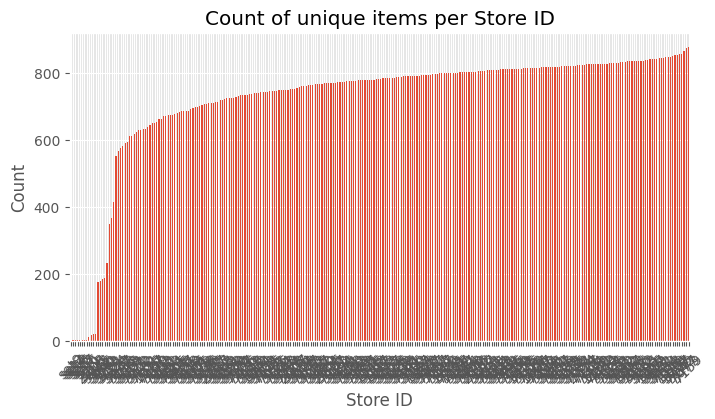

In [107]:
unique_items_per_store = df.groupby('Store ID')['Name'].nunique()
# Sorted from smallest count to largest
sorted_unique_items = unique_items_per_store.nsmallest(539)

# Plot the bar graph
plt.figure(figsize=(8, 4))
sorted_unique_items.plot(kind='bar')
plt.title('Count of unique items per Store ID')
plt.xlabel('Store ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

As suspected there seems to be an issue with how the data set is recorded because  the 'Store ID' column is not tied to a specific store \
I can't seem to find resources online indicating what the 'Store ID' values are.

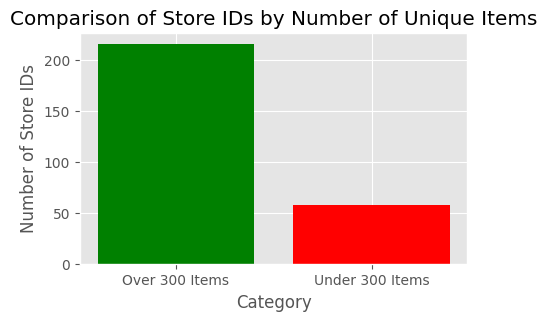

274

In [108]:
over_700 = (sorted_unique_items > 700).sum()
under_700 = (sorted_unique_items <= 700).sum()

store_id_count_data = pd.DataFrame({
    'Category': ['Over 700 Items', 'Under 700 Items'],
    'Count': [over_700, under_700]
})

plt.figure(figsize=(5, 3))
plt.bar(store_id_count_data['Category'], store_id_count_data['Count'], color=['green', 'red'])
plt.title('Comparison of Store IDs by Number of Unique Items')
plt.xlabel('Category')
plt.ylabel('Number of Store IDs')
plt.show()
